In [1]:
from pathlib import Path
import os
import warnings

%load_ext autoreload
%autoreload

# ignore warnings for now ...
warnings.filterwarnings('ignore')

if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

!pwd

/Users/tommylees/github/ml_drought


In [16]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data_dir = Path('data/')
# data_dir = Path('/Volumes/Lees_Extend/data/zip_data')
data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data/')

assert data_dir.exists()

In [17]:
import seaborn as sns
from src.utils import drop_nans_and_flatten

### Open other data (ERA5 / CHIRPS)

In [3]:
e = xr.open_dataset(data_dir / 'interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc')
e

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 35, time: 488)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2019-08-31
  * lon      (lon) float32 33.75 34.0 34.25 34.5 34.75 ... 41.5 41.75 42.0 42.25
  * lat      (lat) float32 6.0 5.75 5.5 5.25 5.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
Data variables:
    p84.162  (time, lat, lon) float64 ...
    pev      (time, lat, lon) float64 ...
    sp       (time, lat, lon) float64 ...
    t2m      (time, lat, lon) float64 ...
    tp       (time, lat, lon) float64 ...

### Convert units `m` to `mm`

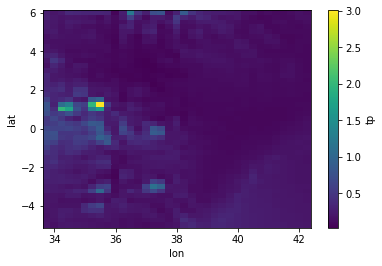

In [8]:
# tp:units = "m" ;
tp = e.tp * 100
tp.mean(dim='time').plot()

# Open S5 Precip

In [11]:
ds = xr.open_dataset(data_dir / 'interim/s5_preprocessed/25_ens_s5.nc')
# tprate:units = "m s**-1" ;

In [10]:
# get one month forecasts
ds = ds.loc[dict(time=ds.months_ahead == 1)]
ds

<xarray.Dataset>
Dimensions:              (lat: 45, lon: 35, number: 25, time: 312)
Coordinates:
  * number               (number) int64 0 1 2 3 4 5 6 7 ... 18 19 20 21 22 23 24
  * lon                  (lon) float32 33.75 34.0 34.25 ... 41.75 42.0 42.25
  * lat                  (lat) float32 6.0 5.75 5.5 5.25 ... -4.5 -4.75 -5.0
  * time                 (time) datetime64[ns] 1993-02-01 ... 2019-01-01
    initialisation_date  (time) datetime64[ns] ...
    forecast_horizon     (time) timedelta64[ns] ...
    months_ahead         (time) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Data variables:
    tprate               (number, lat, lon, time) float64 ...

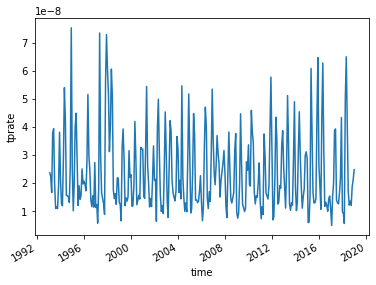

In [12]:
# ensemble mean
ds.tprate.mean(dim='number').mean(dim=['lat', 'lon']).plot()

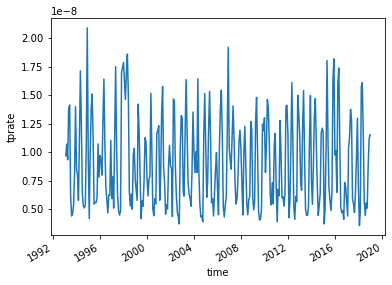

In [13]:
# ensemble std
ds.tprate.std(dim='number').mean(dim=['lat', 'lon']).plot()

### Convert `m s-1` -> `mm/month`

In [13]:
tp_fcast = ds.tprate * (2.628e+6 / 100)

In [19]:
a1 = drop_nans_and_flatten(tp_fcast)
a2 = drop_nans_and_flatten(tp)

In [ ]:
sns.distplot(a1, label='Seas5')
sns.distplot(a2, label='ERA5')
plt.legend()